# Load libraries 

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# load data ,  show some samples 

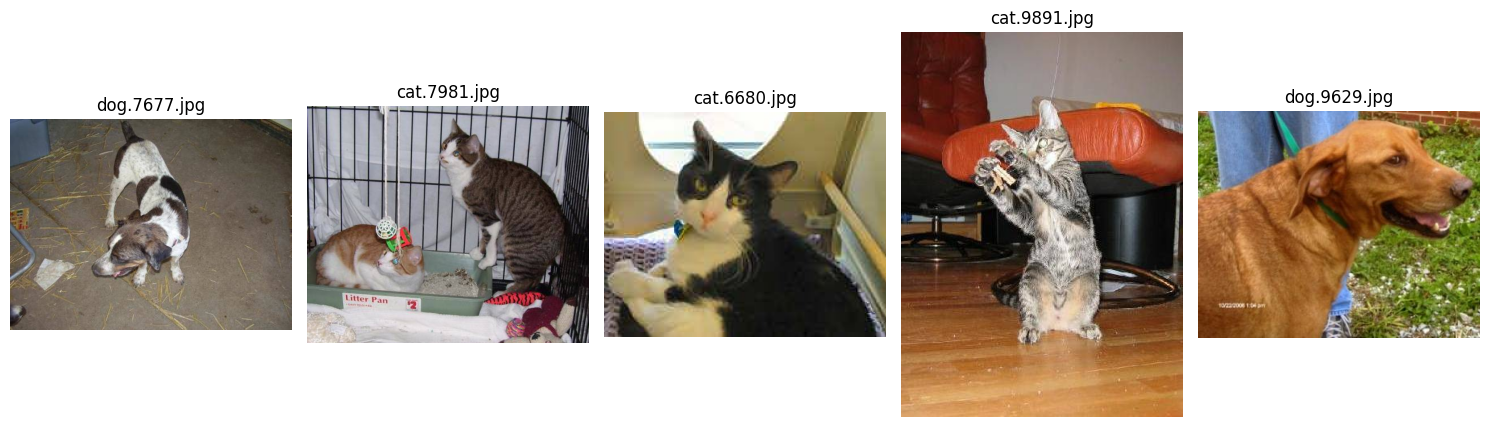

In [12]:
# Path to your dataset
data_dir = '/workspaces/PRODIGY_ML_03/dogs-vs-cats-sample'

# Load and display the first 5 images
images = []
filenames = os.listdir(data_dir)[:5]

for file in filenames:
    img_path = os.path.join(data_dir, file)
    img = cv2.imread(img_path)
    if img is not None:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for correct display
        images.append(img_rgb)
    else:
        print(f"Could not read {file}")

# Plotting the images
plt.figure(figsize=(15, 5))
for i, img in enumerate(images):
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(filenames[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
